# AB-тестирование
## Задание AB.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 50 баллов
* Задача 2 — 130 баллов
* Задача 3 — 30 баллов
* Задача 4 — 50 баллов
* Задача 5 — 50 баллов

In [4]:
# Bot check

# HW_ID: ds_ab3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.proportion import proportion_confint

---
### Задача 1.

Со слов менеджера по развитию интернет-магазина:

> Коллеги, приветики! В прошлом месяце мы проводили эксперимент, в корзине покупателей поставили большую мигающую кнопку "Оплатить" ярко-зеленого цвета. Предполагаем, что покупатель будет быстрее переходить к оплате, не удаляя из корзины лишние товары. Ожидаем прирост выручки на 8-10%. Помогите, пожалуйста, поскорее оценить эффект, очень горят сроки, скоро выплаты премий, надо успеть раскатить. В <a href="https://disk.yandex.ru/i/L64ohe5i6oz58A">файлике</a> инфа по клиентам, пилотные клиенты отмечены в столбце `b_group`. Спасибо огромное!

Помогите коллегам с их запросом.

*Посмотрим на данные повнимательнее*

,gender,OS,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,b_group
0,0,0,0.000000,0.000000,1260.801227,1245.777408,0.000000,0.000000,1381.093860,1237.133907,...,1110.443064,0.000000,0.000000,0.000000,0.000000,1362.797130,1555.238727,0.0,0.00000,no
1,1,0,2142.521523,1821.295907,1832.895312,1646.448173,0.000000,2154.948644,1912.998501,1795.471291,...,0.000000,2253.871388,2526.126916,2861.138746,3068.924457,3384.232538,0.000000,0.0,0.00000,yes
2,1,1,2064.105816,0.000000,0.000000,1454.148004,1821.118092,1917.801237,2188.827425,0.000000,...,1605.922754,0.000000,0.000000,1672.408077,1403.642040,1094.256738,962.442222,0.0,1483.00722,no


gender: 0.53 (A), 0.53 (B)
OS: 0.27 (A), 0.27 (OS)
Тут всё хорошо


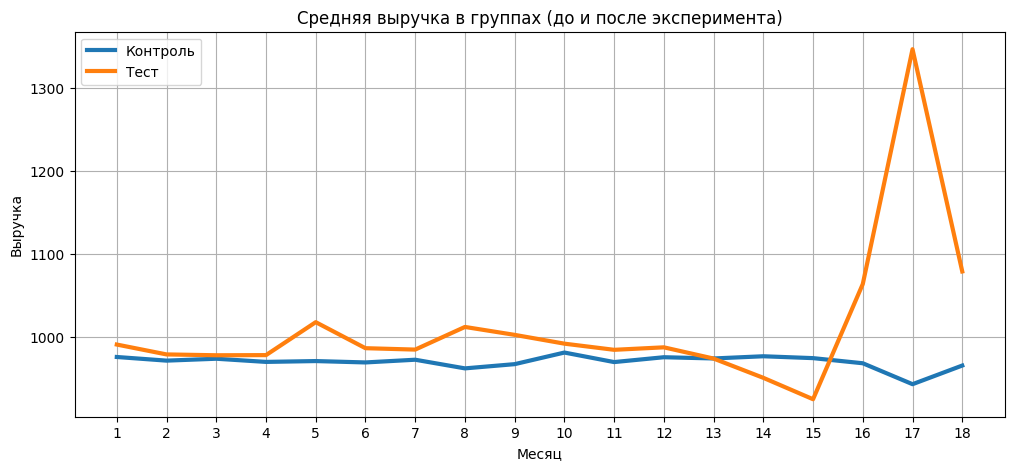

In [6]:
df = pd.read_excel('hw_ab3_task1.xlsx').drop('Unnamed: 0', axis=1)
df['gender'] = df['gender'].apply(lambda x: {'woman':0,'man':1}[x])  # сразу кодируем пол и ос
df['OS'] = df['OS'].apply(lambda x: {'Android':0,'iOS':1}[x])
months = np.arange(1,19)
df = df.rename(columns={f'month{m}':m for m in months})  # более удобная нумерация месяцев
display(df.head(3))

A,B = df[df.b_group=='no'].drop('b_group', axis=1), df[df.b_group=='yes'].drop('b_group', axis=1)  # разобьем на группы А и В

print(f'gender: {A.gender.mean():.2f} (A), {B.gender.mean():.2f} (B)')  # убедимся, что пропорции в группах +- близки
print(f'OS: {A.OS.mean():.2f} (A), {B.OS.mean():.2f} (OS)')
print('Тут всё хорошо')

plt.figure(figsize=(12,5))
plt.title('Средняя выручка в группах (до и после эксперимента)')  # на всякий случай еще сравним группы визуально
plt.plot(months, A[months].mean(), lw=3, label='Контроль')
plt.plot(months, B[months].mean(), lw=3, label='Тест')
plt.xticks(months)
plt.grid()
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

*По графику видно, что до эксперимента (месяцы 1-17) выручка в группах уже отличалась (сильнее всего - в последнем, 17м месяце). Это странно, скорее всего в процедуре была допущена ошибка, разбиение юзеров не рандомное. Кажется, юзеры разбиты на основании активности в том самом 17м месяце. Стратифицируем юзеров по этому признаку*

In [7]:
A['strata'], B['strata'] = (A[17]>0).astype(int), (B[17]>0).astype(int)

*Вспомним функции из предыдущего дз и ноутбуков с сайта*

In [8]:
def random_sampler(data, sample_size):
    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]

def sample_mean_diff(data, sample_size, n_iter):
    mean_sample = np.zeros(n_iter)
    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()
    return mean_sample

def calculate_strata_weights(data):
    strata_weights = data.groupby(by='strata')[data.columns[0]].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, weights):
    strata_means = data.groupby(by='strata')[data.columns[0]].mean()
    return (strata_means * weights).sum()

def simple_mean(data, weights):
    return data['sample'].mean()

def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    strata_weights = calculate_strata_weights(data)
    mean_sample = np.zeros(n_iter)
    for i in tqdm(range(n_iter)):
        groups = sampler(data, sample_size)  # Семплирование
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)  # Вычисление разности средних
    return mean_sample

def weighted_var(data, strata_weights):
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)

def weighted_post_var(data, strata_weights):
    strata_vars = data.groupby(by='strata')[data.columns[0]].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition

def simple_var(data, strata_weights):
    return data['sample'].var() / len(data)

def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    if method == 'random':
        mean_function, var_function = simple_mean, simple_var
    elif method == 'stratified':
        mean_function, var_function = weighted_mean, weighted_var
    elif method == 'post_stratified':
        mean_function, var_function = weighted_mean, weighted_post_var
    stat = mean_function(x_data, strata_weights) - mean_function(y_data, strata_weights)
    std = np.sqrt(var_function(x_data, strata_weights) + var_function(y_data, strata_weights))
    return stat, 2*sps.norm.sf(np.abs(stat / std))  # stat, pval

def cuped_transform(x_data, y_data, target=18, covariate=17):
    theta = (np.cov(x_data[covariate],x_data[target])[0,1] + np.cov(y_data[covariate],y_data[target])[0,1]) / (x_data[covariate].var(ddof=0) + y_data[covariate].var(ddof=0))
    x_data['cuped'], y_data['cuped'] = x_data[target] - theta*x_data[covariate], y_data[target] - theta*y_data[covariate]
    return x_data, y_data

def cuped_ttest(x_data, y_data, target=18, covariate=17, strata_weights=None):
    x_data, y_data = cuped_transform(x_data, y_data, target=target, covariate=covariate)
    if strata_weights is not None:
        return stratified_ttest(x_data[['cuped','strata']], y_data[['cuped','strata']], strata_weights, method='post_stratified')
    return sps.ttest_ind(x_data[['cuped','strata']], y_data[['cuped','strata']])

def run_experiments(data, sample_size=1000, effect=0, target=18, alpha=0.05, n_iter=10000):  # AA-тесты для оценки мощности
    n_rejects, pvals = 0, []
    for _ in tqdm(range(n_iter), leave=False):
        indices = np.random.choice(np.arange(len(data)), size=2*sample_size)
        x_data, y_data = data.iloc[indices[:sample_size]], data.iloc[indices[sample_size:]]
        y_data[target] *= (1+effect)
        pvals.append(cuped_ttest(x_data, y_data)[1][0])
        n_rejects += (pvals[-1] < alpha)
    return n_rejects / n_iter  # вернет мощность

def draw_power(powers, sample_sizes):  # Построение графика мощности
    plt.figure(figsize=(10,4))
    plt.plot(sample_sizes, powers, lw=3)
    plt.hlines(0.8, sample_sizes[0], sample_sizes[-1], color='black', alpha=0.5, label='Мощность 0.8')
    plt.xlabel('Размер выборки')
    plt.ylabel('Мощность')
    plt.title('Мощность')
    plt.show()

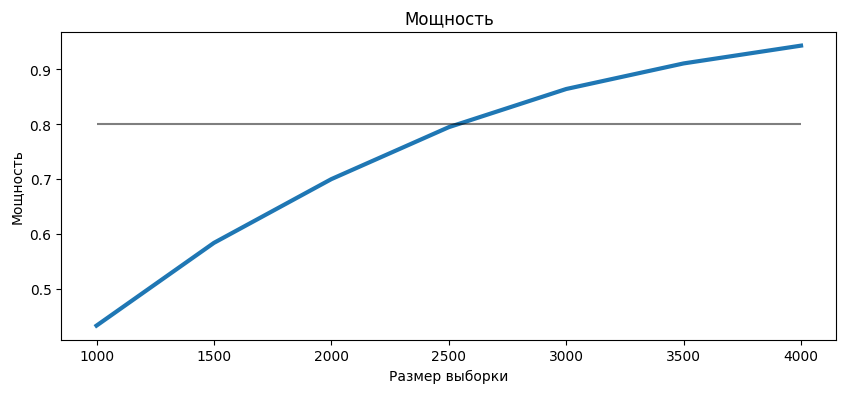

In [9]:
sample_sizes = np.arange(1000,4001,500)
powers = [run_experiments(A, sample_size, 0.09, 18) for sample_size in sample_sizes]
draw_power(powers, sample_sizes)

*По графику видно, что пересечение вблизи 2500 => оптимальный (для наблюдения минимального детектируемого эффекта) opt_sample_size=2500*

In [10]:
opt_sample_size = 2500
A_sample, B_sample = A.sample(opt_sample_size).drop(['gender','OS'],axis=1), B.sample(opt_sample_size).drop(['gender','OS'],axis=1)
df['strata'] = (df[17] > 0).astype(int)
strata_weights = calculate_strata_weights(df)
print(f'p-value: {cuped_ttest(A_sample, B_sample, target=18, covariate=17, strata_weights=strata_weights)[1]:.2f}')

p-value: 0.68


*Вывод: p-value > 0.05, статистически эффект подтвердить не удалось. Кажется, никаких премий в этом году(*

---
### Задача 2.

Вам <a href="https://disk.yandex.ru/d/d9uxKFsst-YBkA">выдана</a> часть информации о визитах пользователей на сайте Физтех.Статистики начиная с 2020 года по данным Яндекс.Метрики. Визит &mdash; последовательность действий пользователя на сайте, которая начинается на некоторой странице сайта, содержит в себе переходы по ссылкам (и другие действия), и заканчивается на какой-то, возможно, другой страницей сайта. Визит считается завершенным, если активность отсутствует в течение некоторого времени, обычно &mdash; 30 минут.

Описание полей доступно по <a href="https://yandex.ru/dev/metrika/doc/api2/logs/fields/visits.html">ссылке</a>.

Ознакомьтесь с данными, ответив на следующие вопросы.
1. Сколько всего визитов представлено в данных?
2. Когда совершены первый и последний визиты?
3. Постройте динамику количества визитов во времени по дням.
4. Сколько уникальных пользователей в данных?
5. Сколько в среднем один пользователь совершил визитов? Сколько максимально?
6. Постройте гистограмму глубины и продолжительности визитов.
7. Из каких стран больше пользователей?
8. Какие браузеры и операционные системы в топе?

*Вопросы даны сплошным списком: видимо, ответ ожидается в виде цельного отчета*

1. Всего визитов в данных: 387353
2. Первый визит: 2020-01-01 03:28:50, последний визит: 2024-02-25 23:58:46. Данные охватывают 1516 дней


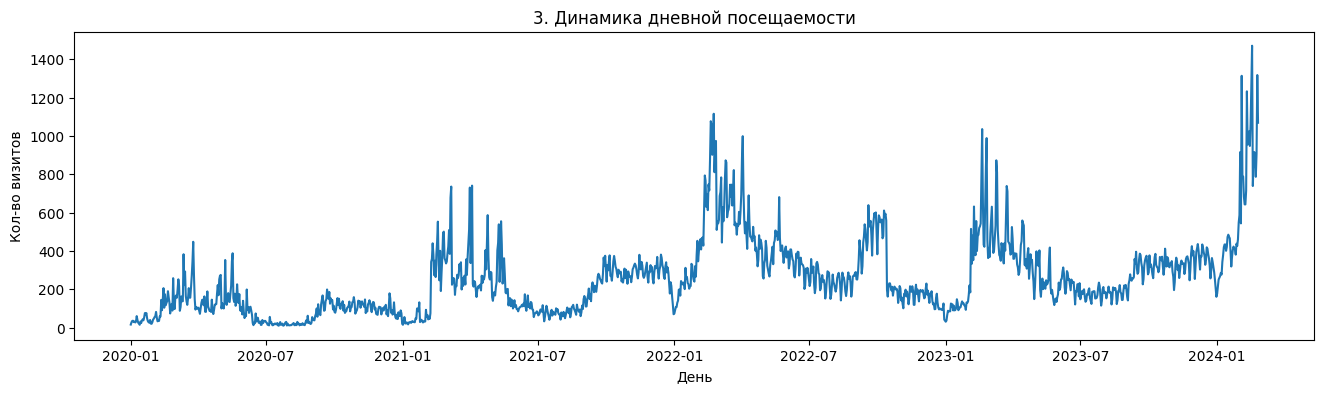

видна годовая сезонность (что объясняется привязкой к учебному году)

4. Всего уникальных пользователей: 162474
5. В среднем один юзер совершил 2.4 визитов. Максимально - 58700 (кажется, это ошибка или бот)


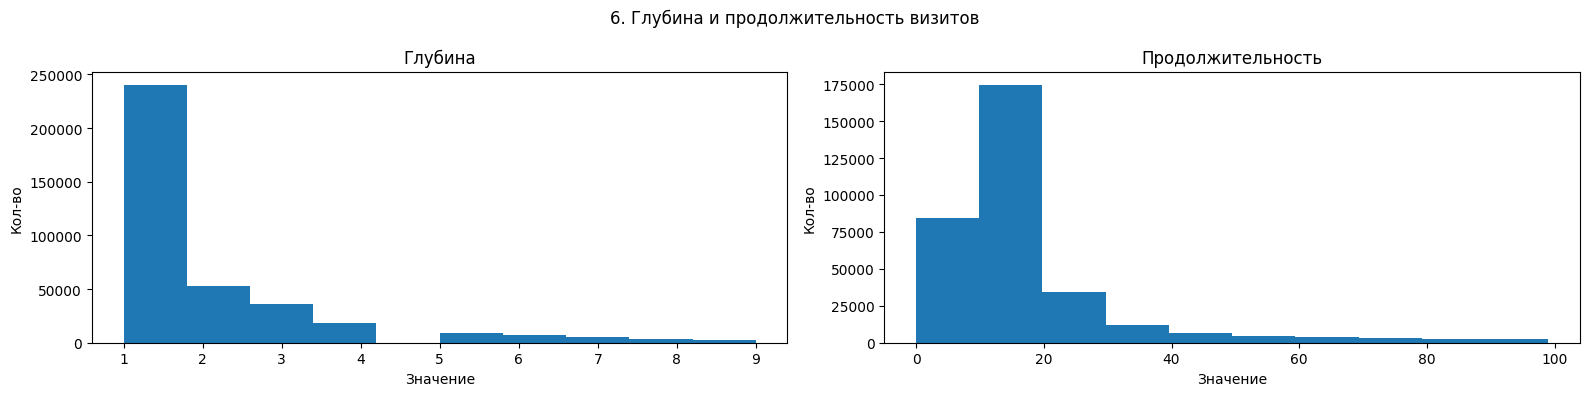

визиты как правило короткие (порядка 10-20 мин) и неглубокие (глубины 1-2)



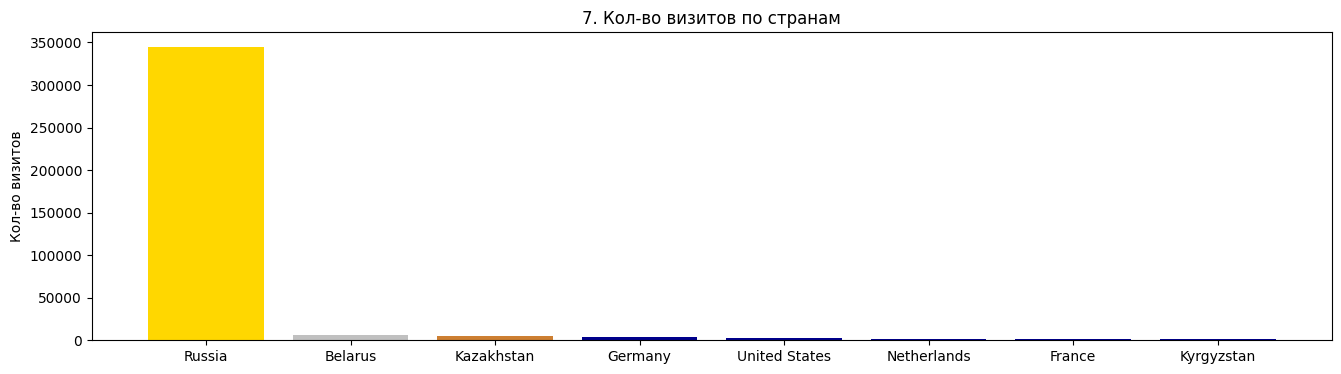

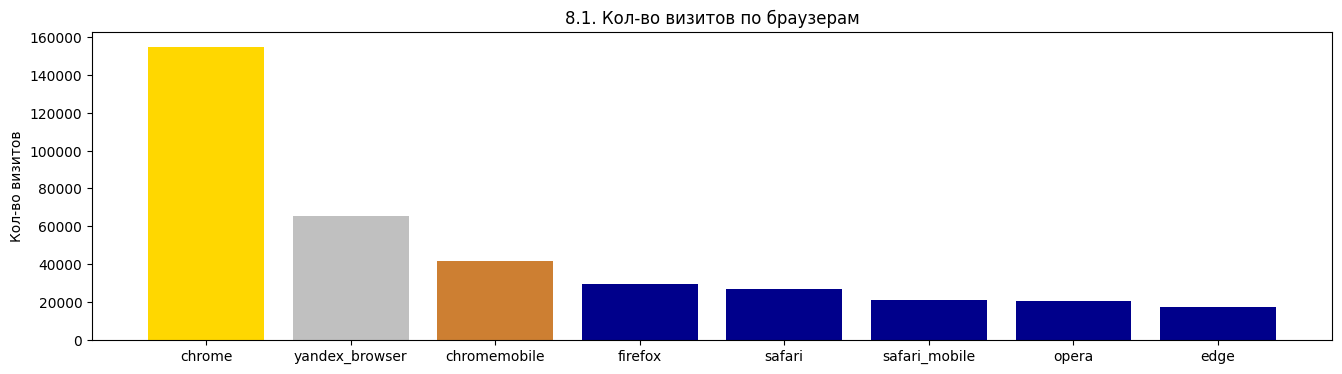

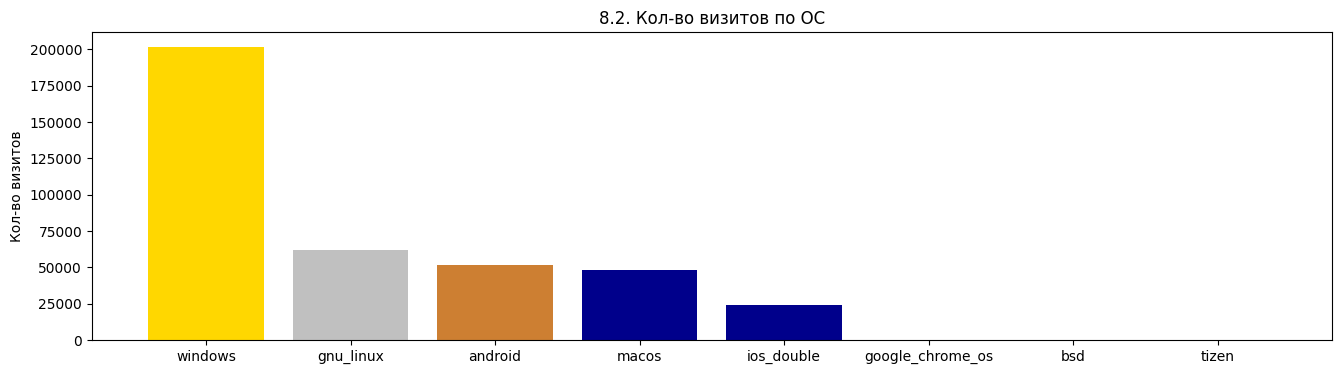

больше всего Россиян с chrome и windows. Соседние постсоветские страны (Беларусь, Казахстан) могут соответствовать иностранным студентам, а остальные - визитам с впн



In [11]:
df = pd.read_csv('miptstats_metrica.tsv', sep='\t')
df['ym:s:dateTimeUTC'] = pd.to_datetime(df['ym:s:dateTimeUTC'])
# display(df.head(3))

assert len(df)==df['ym:s:visitID'].nunique()
print(f"1. Всего визитов в данных: {len(df)}")
m, M = df['ym:s:dateTimeUTC'].min(), df['ym:s:dateTimeUTC'].max()
print(f"2. Первый визит: {m}, последний визит: {M}. Данные охватывают {(M-m).days} дней")

plt.figure(figsize=(16,4))
plt.plot(df.groupby(df['ym:s:dateTimeUTC'].dt.date)['ym:s:visitID'].count())
plt.xlabel('День')
plt.ylabel('Кол-во визитов')
plt.title('3. Динамика дневной посещаемости')
plt.show()
print('видна годовая сезонность (что объясняется привязкой к учебному году)\n')

print(f"4. Всего уникальных пользователей: {df['ym:s:clientID'].nunique()}")
user_visits = df.groupby('ym:s:clientID')['ym:s:clientID'].count()
print(f"5. В среднем один юзер совершил {user_visits.mean():.1f} визитов. Максимально - {user_visits.max()} (кажется, это ошибка или бот)")

fig, axs = plt.subplots(1, 2, figsize=(16,4))
plt.suptitle('6. Глубина и продолжительность визитов')
for ax,feat,title,lim in zip(axs,['ym:s:pageViews','ym:s:visitDuration'],['Глубина','Продолжительность'],[10,100]):
    ax.hist(df[df[feat]<lim][feat])  # много больших выбросов, lim выбран на глаз
    ax.set_title(title)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Кол-во')
plt.tight_layout()
plt.show()
print('визиты как правило короткие (порядка 10-20 мин) и неглубокие (глубины 1-2)\n')

for i,feat,title in zip(['7','8.1','8.2'],['ym:s:regionCountry','ym:s:browser','ym:s:operatingSystemRoot'],['странам','браузерам','OC']):
    groupped = df.groupby(feat)['ym:s:visitID'].count().sort_values(ascending=False)[:8]
    plt.figure(figsize=(16,4))
    plt.bar(groupped.index, groupped, color=['gold','silver','#CD7F32',*(['darkblue']*5)])
    plt.ylabel('Кол-во визитов')
    plt.title(f'{i}. Кол-во визитов по {title}')
    plt.show()
print('больше всего Россиян с chrome и windows. Соседние постсоветские страны (Беларусь, Казахстан) могут соответствовать иностранным студентам, а остальные - визитам с впн\n')

В апреле команда Физтех.Статистики планирует провести эксперимент продолжительностью 4 недели, покрасив фон всех страниц в розовый цвет, а также добавив к нему анимированных котиков и сердечек. *Гипотеза &mdash; средняя по посетителям глубина просмотра страниц вырастет на 5%.* Вам, как студентам DS-потока, предстоит задизайнить этот эксперимент. 

Выберите размеры групп на основе некоторых соображений.

*Размер групп возьмем минимально возможный, но такой, чтобы эффект из условия (mde 5%) был задетектирован (т.е. мощность составила 80%)*

Для абсолютного и относительного t-test проведите валидацию по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей. В рамках валидации оцените вероятность ошибки 1 рода и мощность критериев для ожидаемого эффекта.

Следите чтобы используемые интервалы времени не выходили за границы доступных данных. Возможно, на основе проведенного ранее первичного анализа данных стоит ограничить длину исторических данных, по которой будете проводить варидацию.

Распишите подробно поэтапный алгоритм валидации:

*0. Определим константы: ур-нь значимости α=0.05, мощность β=0.8, желаемый эффект mde=5%.*  
*1. Валидация α с помощью АА-тестов. Хотим, чтобы α покрылась дов.интервалом (в идеале) или была слева от него (в случае низкой мощности).*   
*2. Валидация β с помощью тестов с искусственным добавлением эффекта. Хотим, чтобы после добавления mde к тесту мощность осталась больше порога 0.8.*   
*3. Выбираем подходящий размер выборки*   

Реализуйте его

In [18]:
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
    '''
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
    return prob_reject, left_bound, right_bound


def visualization(prob_reject, left_bound, right_bound, pvals=None, alpha=0.05, title=None):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(14,3))
        plt.subplot(1, 2, 1)
        plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7, weights=np.ones(len(pvals)) / len(pvals))
        plt.title('Распределение p-value')
        plt.figure(figsize=(14,3))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between([left_bound, right_bound], [0.15]*2, [-0.15]*2, color='green', alpha=0.6)
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(f'Доля отвержений = {100*prob_reject:.2f}%, интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)')
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def run_experiments(test, df, sample_size=1000, title=None, n_iter=1000, effect=0, alpha=0.05, stratified=False):
    n_rejects, pvals = 0, []
    df['date'] = df['ym:s:dateTimeUTC'].dt.date
    gb = df.groupby('ym:s:clientID').agg(date=('date','min')).sort_values(by='date')
    from_date, to_date = gb.iloc[0].date, gb.iloc[2*sample_size+1].date
    for _ in tqdm(range(n_iter), leave=False):
        date = from_date + pd.Timedelta(np.random.randint(0, (to_date-from_date).days))
        df_cur = df[df.date >= date]
        df_cur = df.groupby('ym:s:clientID').agg(depth=('ym:s:pageViews','mean'), strata=('strata','max'))
        # strata_weights = calculate_strata_weights(df_cur)
        idx = np.random.choice(np.arange(len(df_cur)), size=2*sample_size)
        x_data, y_data = df_cur.iloc[idx[:sample_size]], df_cur.iloc[idx[sample_size:]]
        y_data['depth'] *= (1+effect)
        if stratified:
            pvals.append(test(x_data[['depth','strata']], y_data[['depth','strata']])[1])
        else:
            pvals.append(test(x_data.depth, y_data.depth)[1])
        n_rejects += (pvals[-1] < alpha)
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    visualization(prob_reject, left_bound, right_bound, pvals, alpha, title)
    return prob_reject, left_bound, right_bound

from collections import defaultdict
df['strata'] = df['ym:s:operatingSystemRoot'].apply(lambda x: defaultdict(lambda:4, {'windows':0,'gnu_linux':1,'android':2,'macos':3})[x])

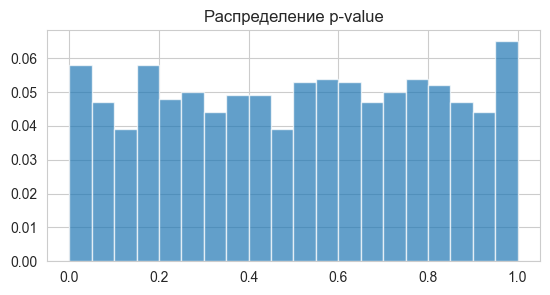

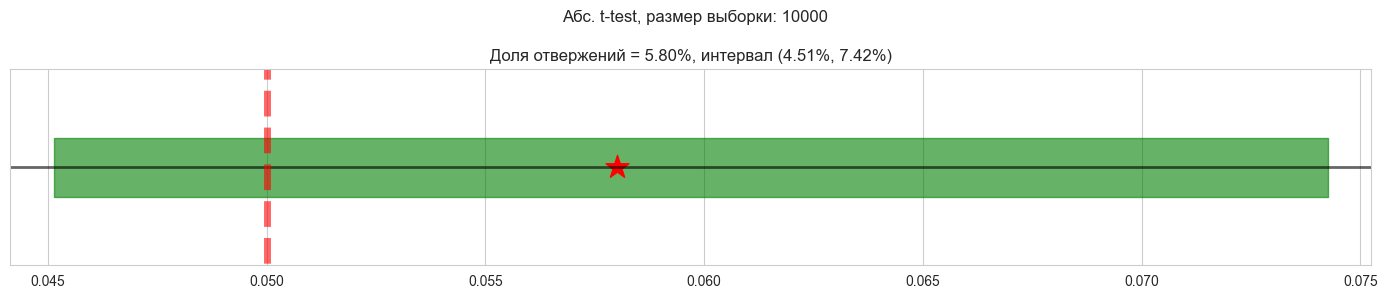

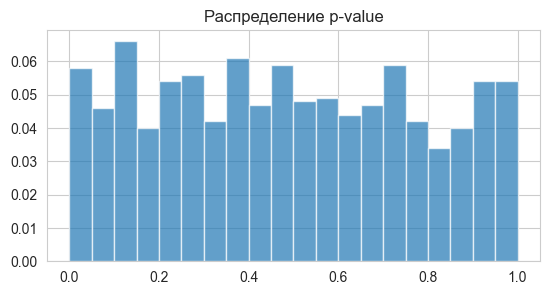

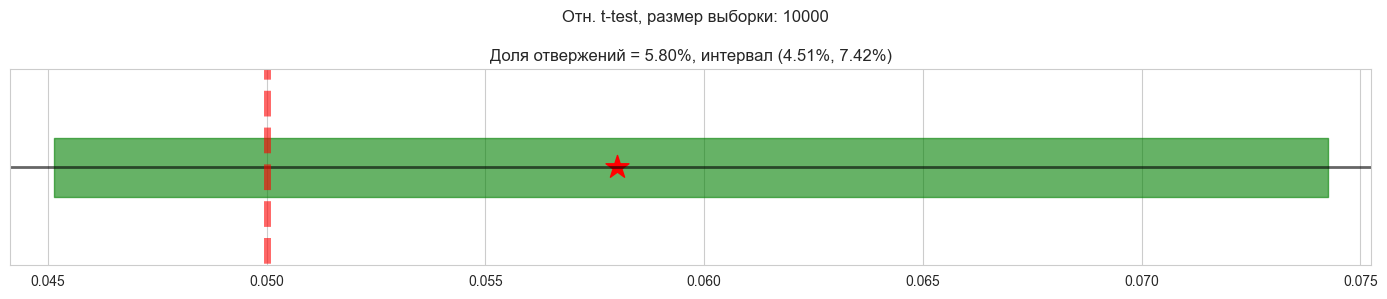

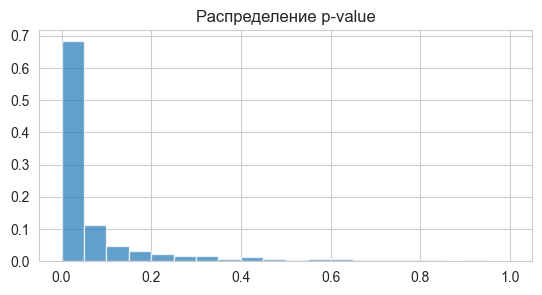

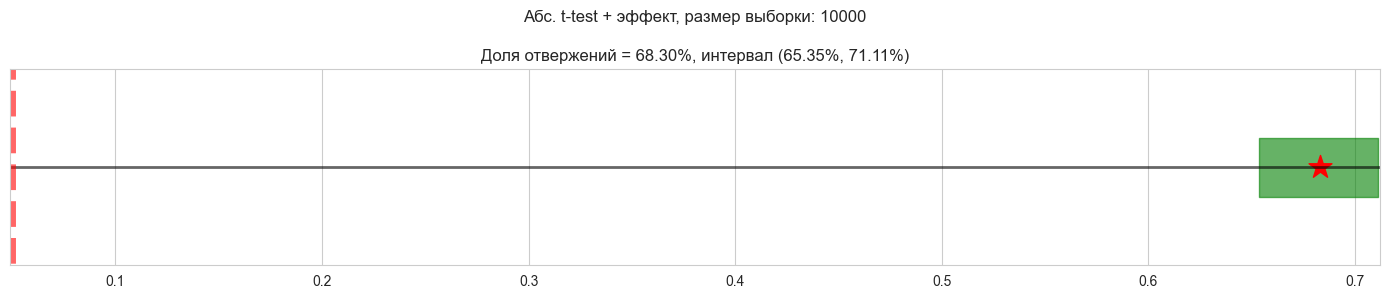

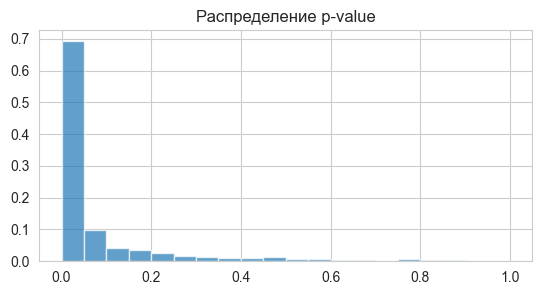

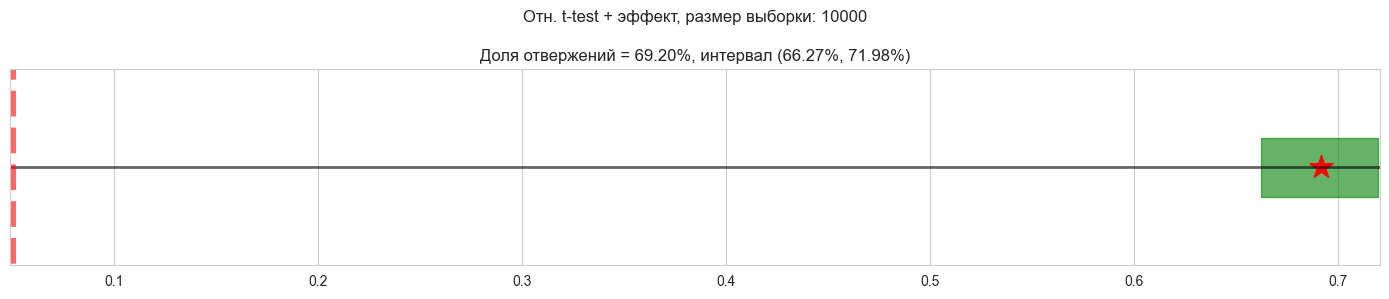

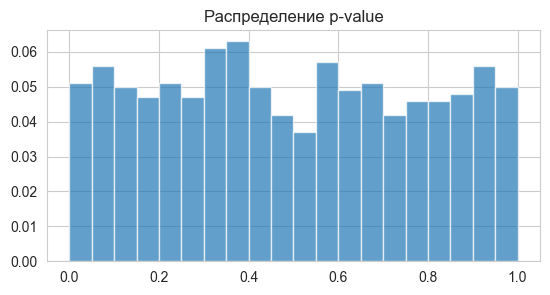

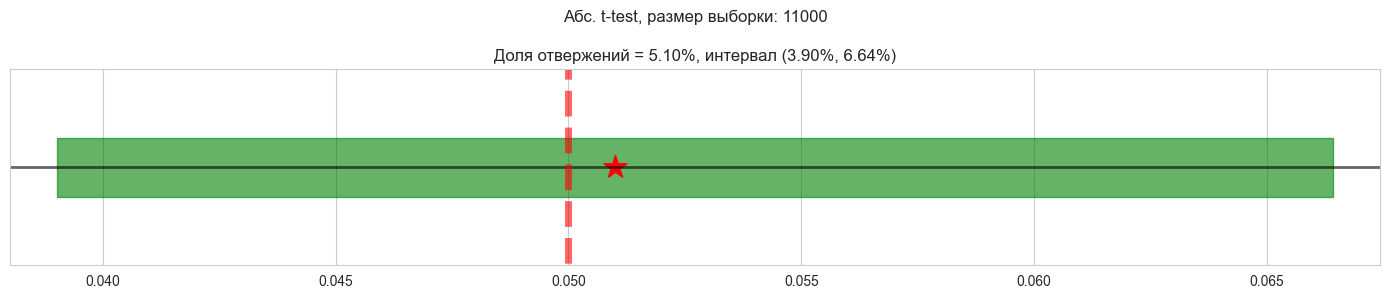

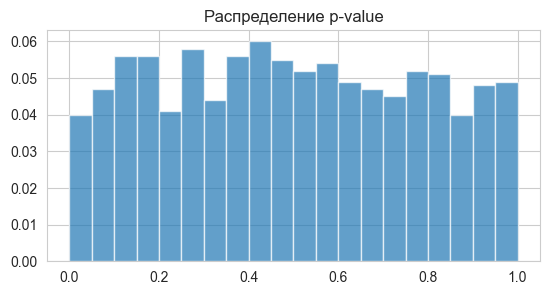

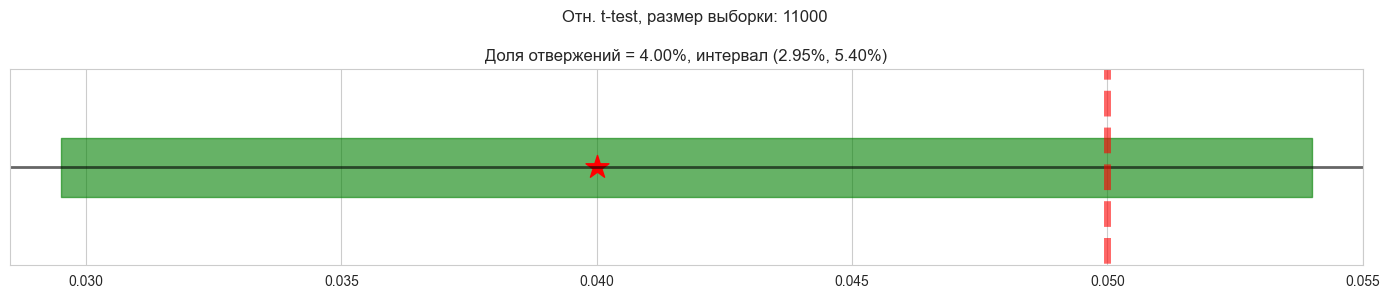

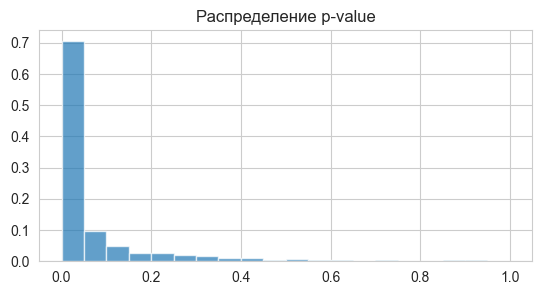

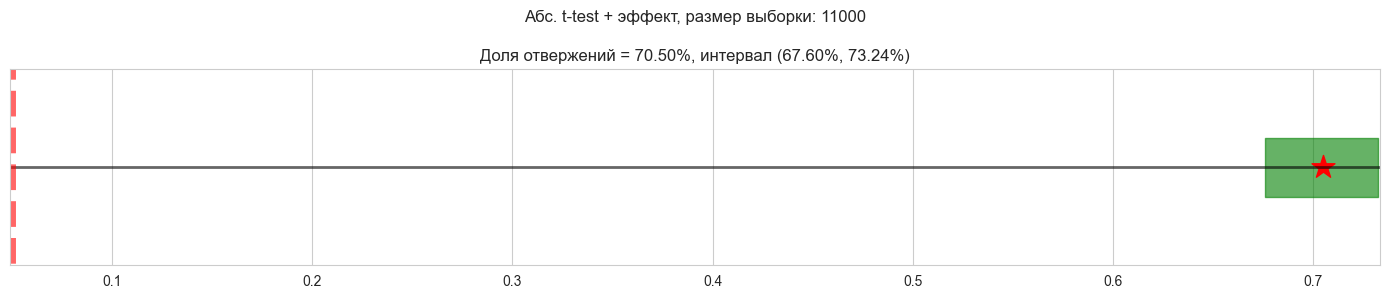

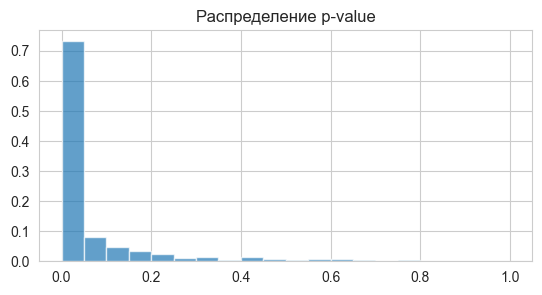

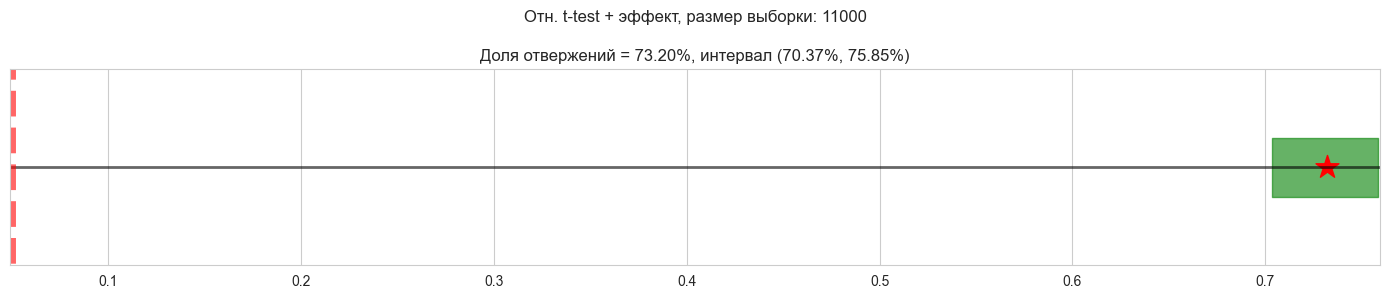

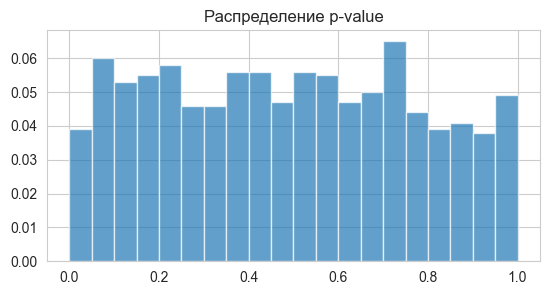

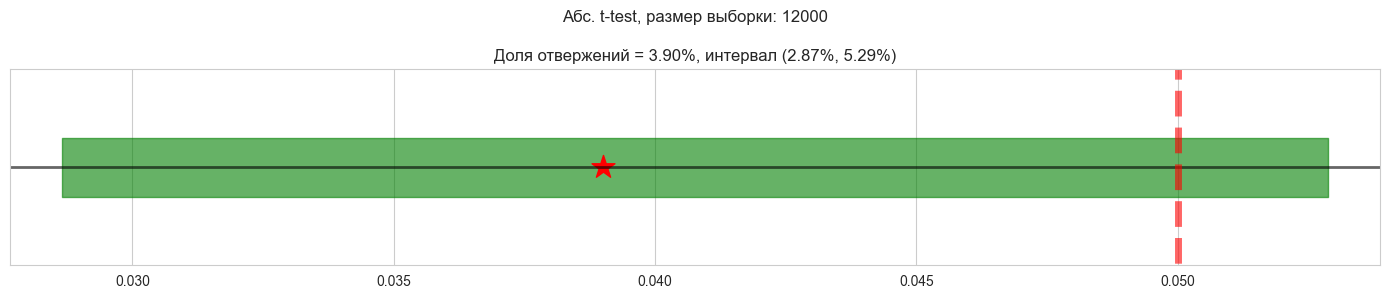

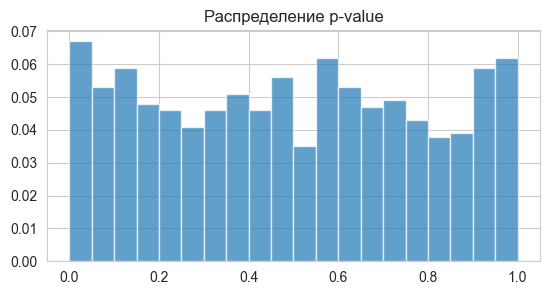

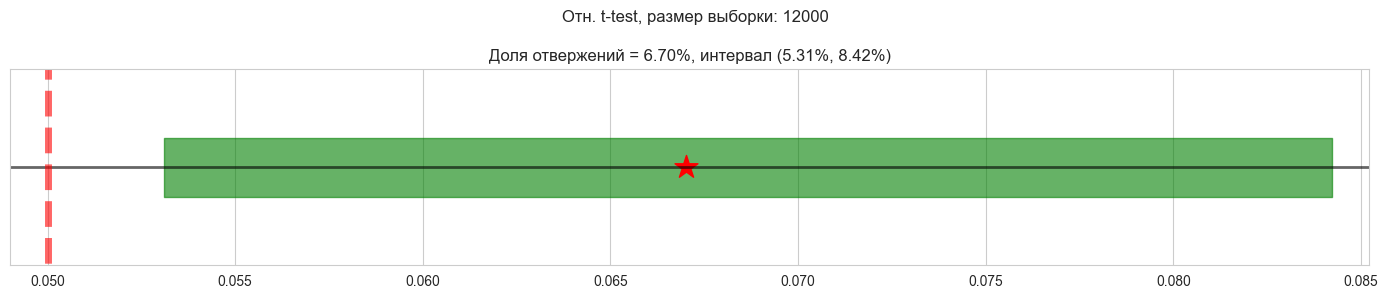

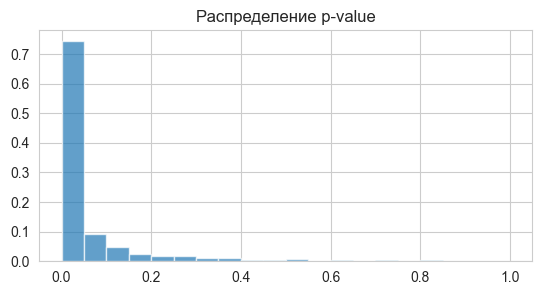

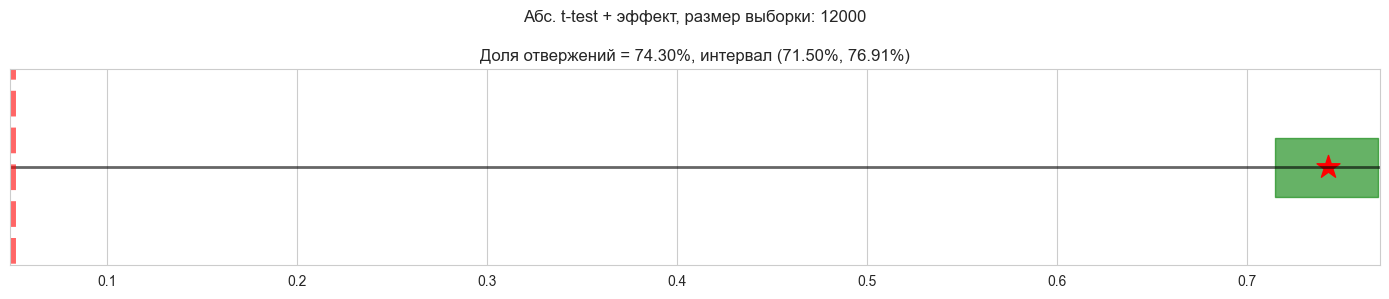

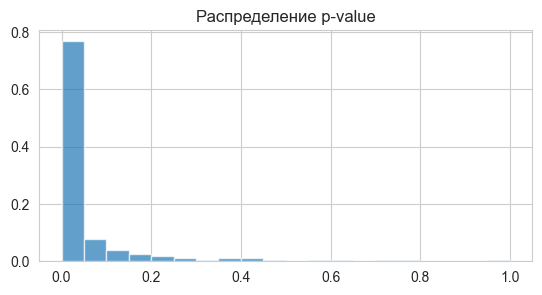

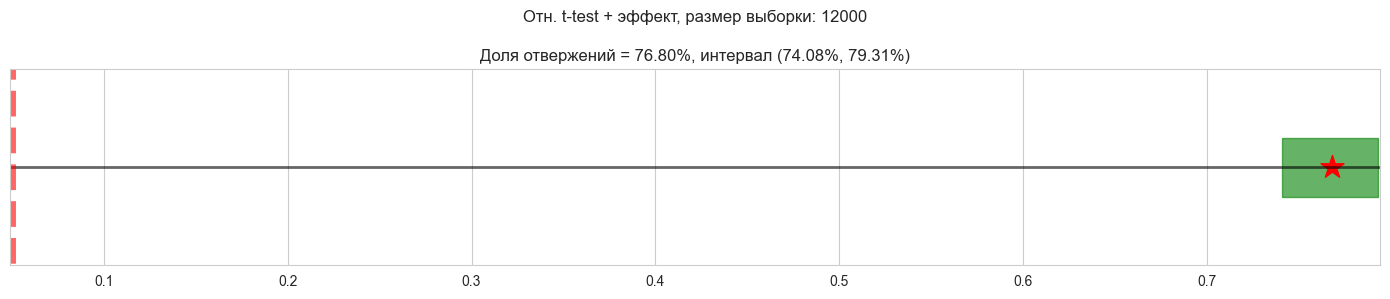

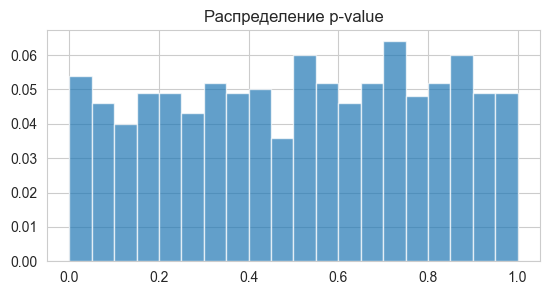

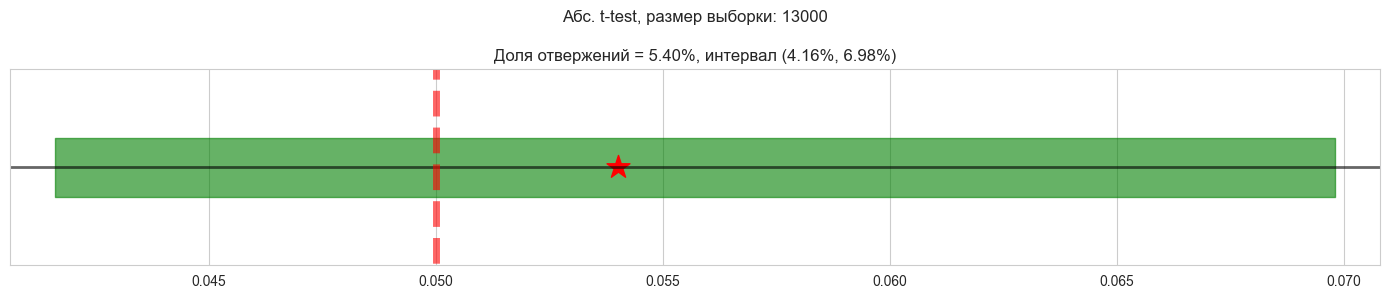

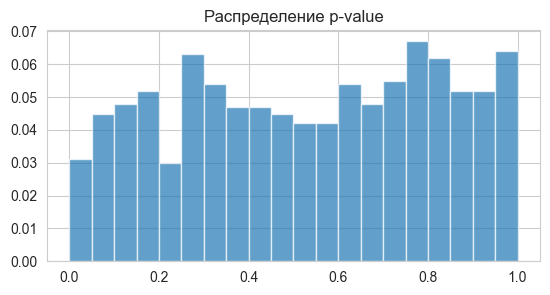

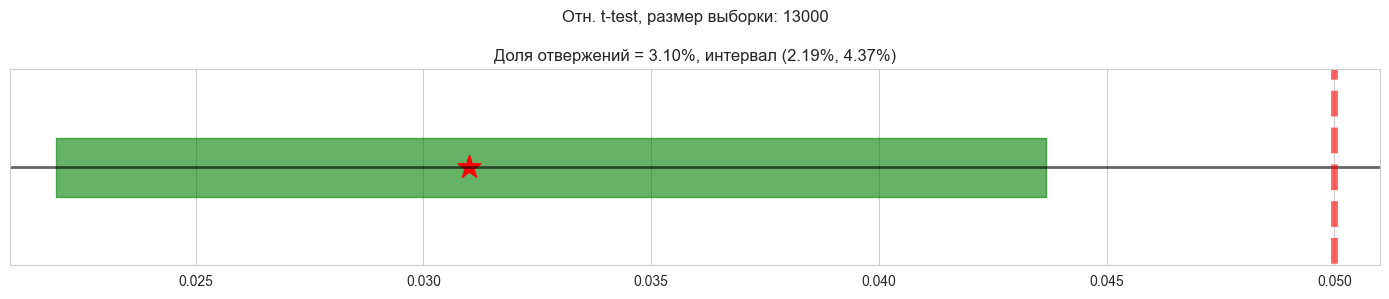

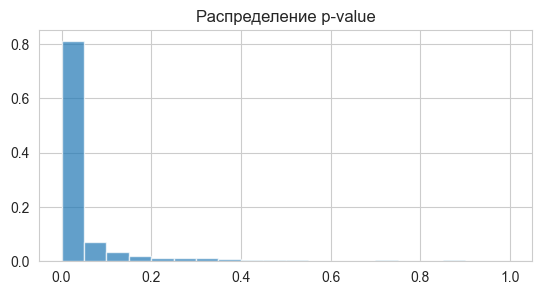

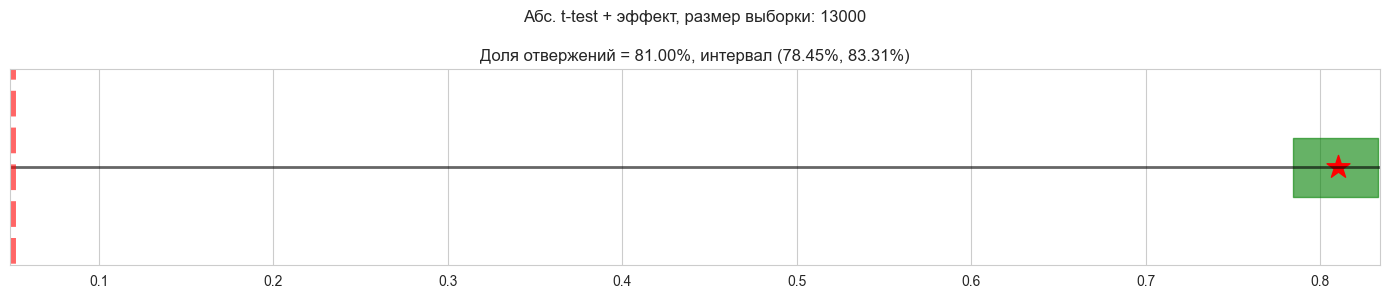

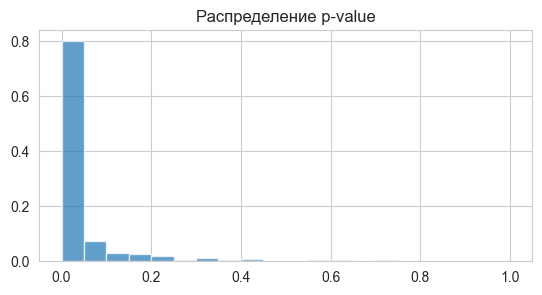

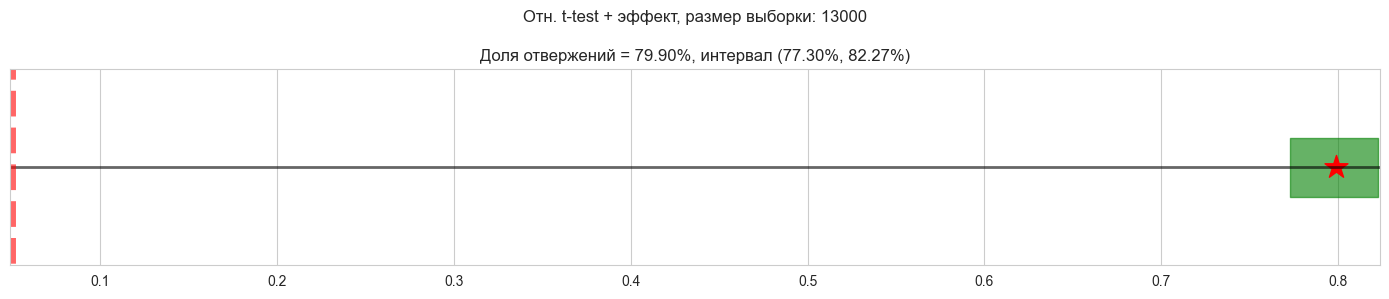

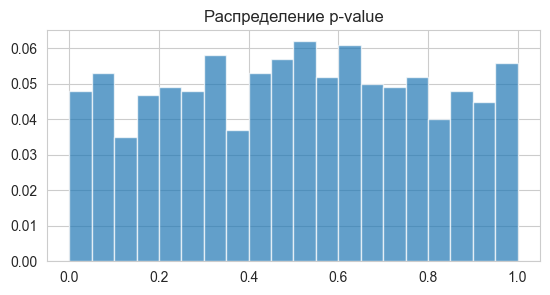

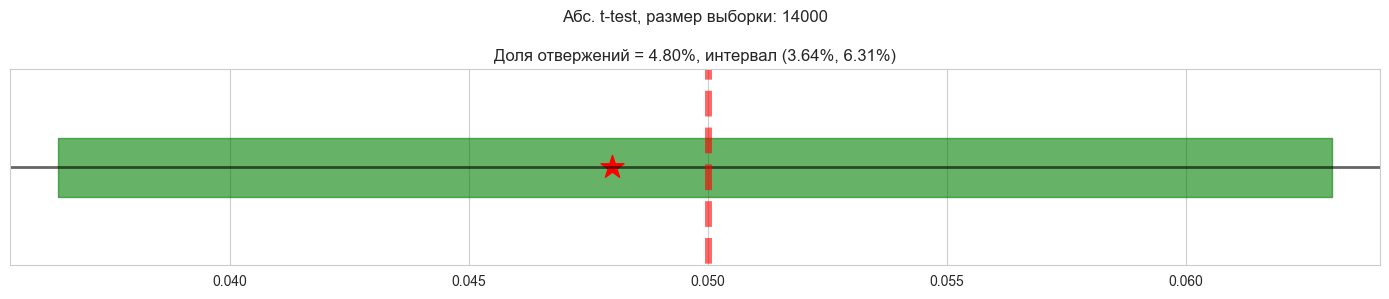

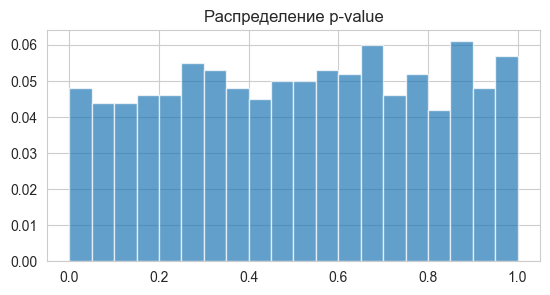

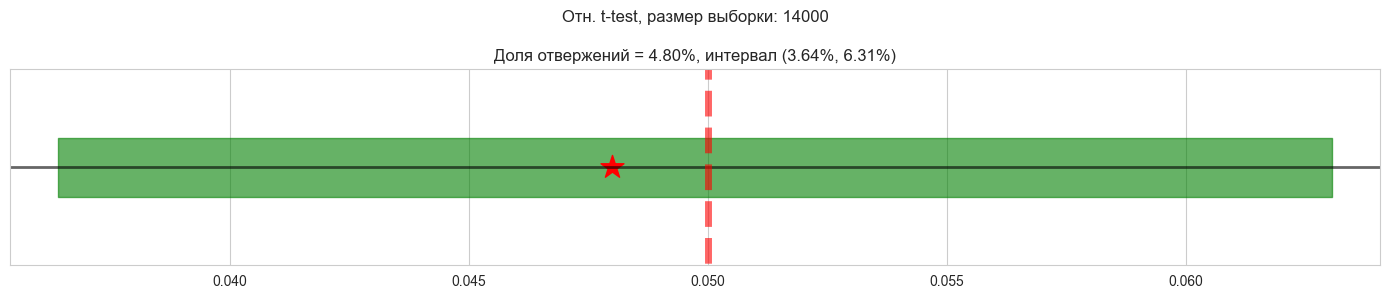

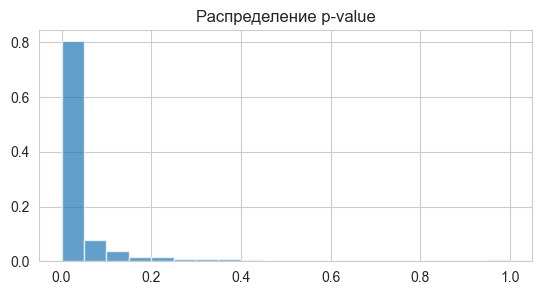

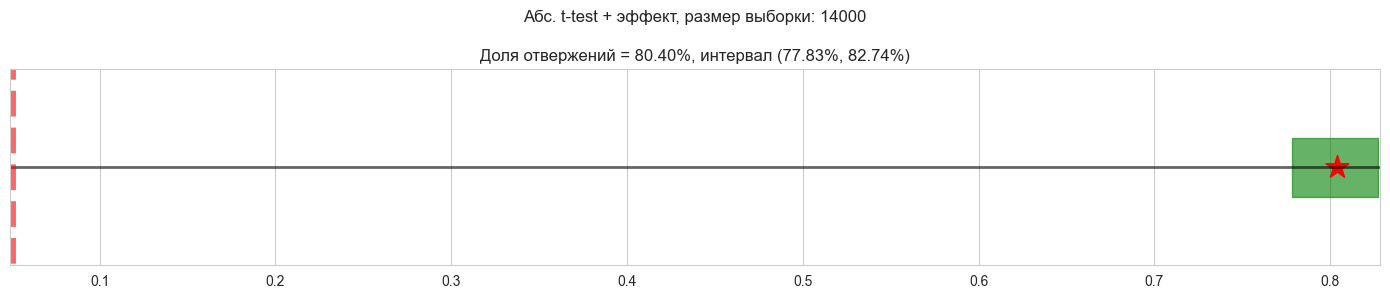

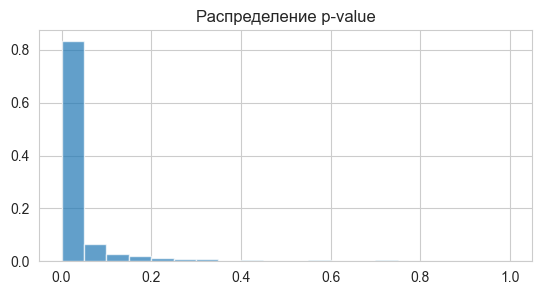

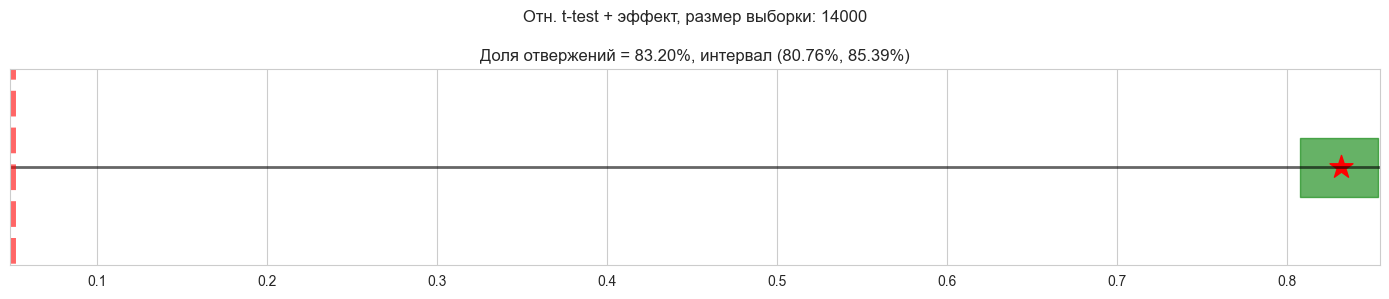

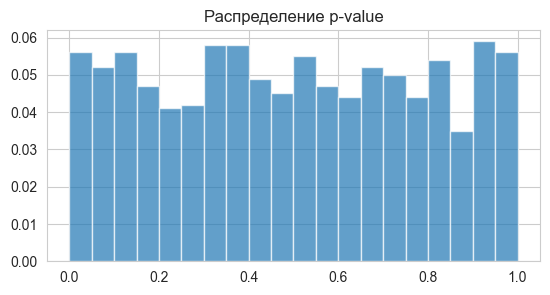

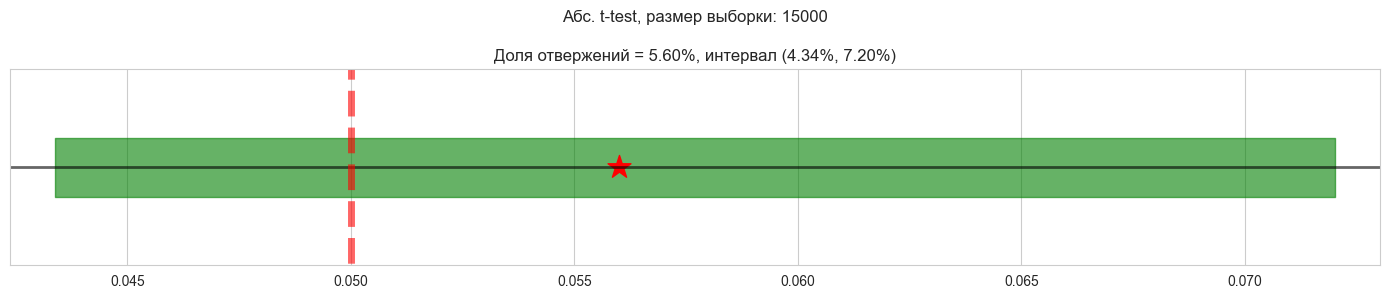

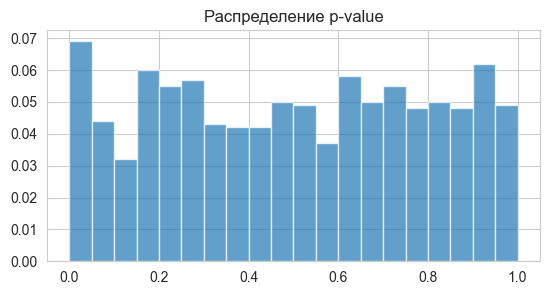

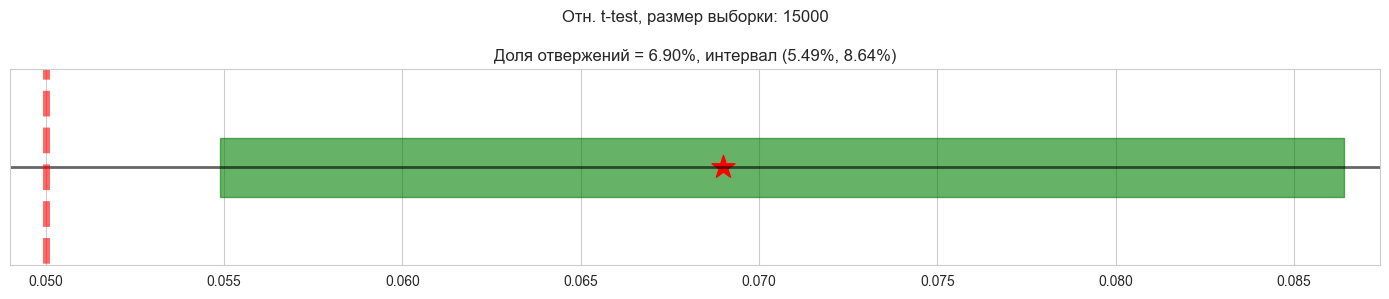

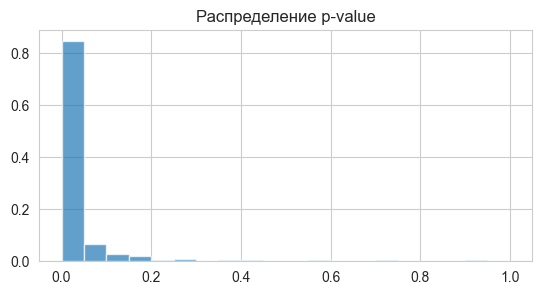

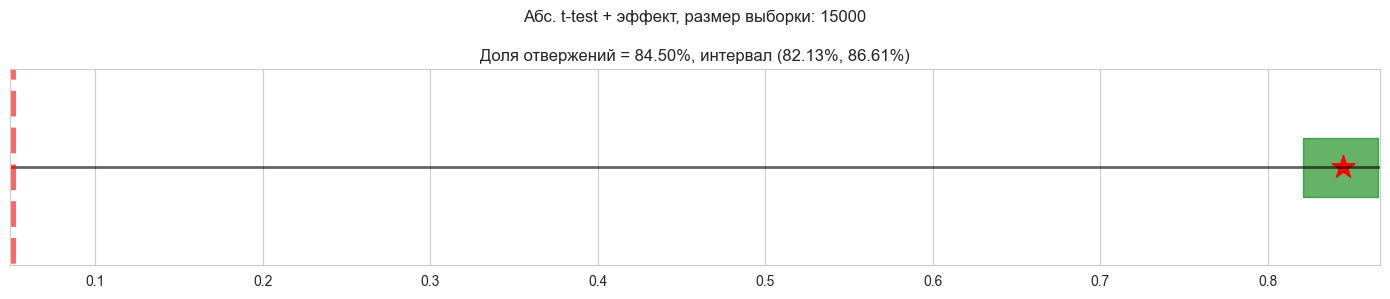

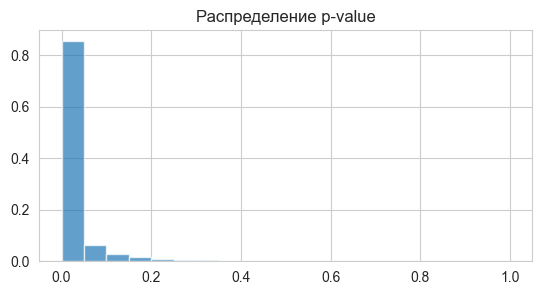

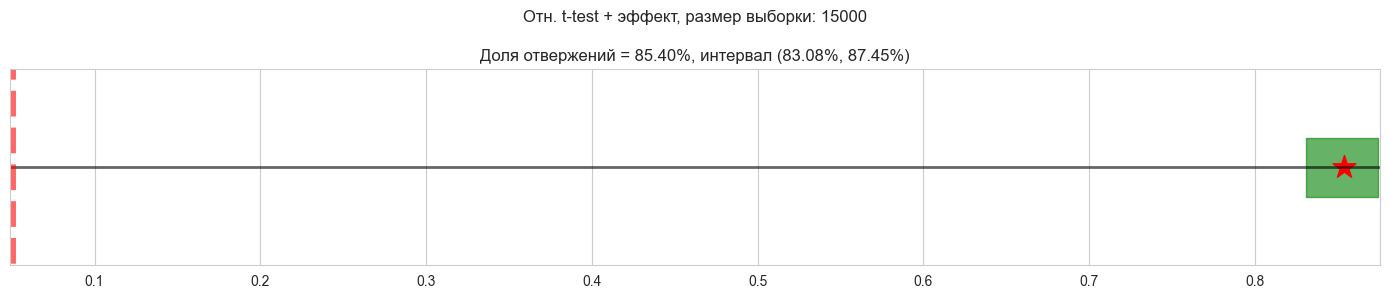

In [19]:
for sample_size in np.arange(10000,15001,1000):
    run_experiments(sps.ttest_ind, df, sample_size, f'Абс. t-test, размер выборки: {sample_size}')
    run_experiments(sps.ttest_rel, df, sample_size, f'Отн. t-test, размер выборки: {sample_size}')
    run_experiments(sps.ttest_ind, df, sample_size, f'Абс. t-test + эффект, размер выборки: {sample_size}', effect=0.05)
    run_experiments(sps.ttest_rel, df, sample_size, f'Отн. t-test + эффект, размер выборки: {sample_size}', effect=0.05)

*Практически во всех случаях тест валиден. Желаемая мощность достигается при opt_sample_size = 13000*

Провалидируйте и сравните следующие подходы к уменьшению дисперсии.
1. Стратификация по операционной системе. Редко встречающиеся операционные системы можно исключить или же объединить с какой-то другой стратой.
2. CUPED со стандартной ковариатой &mdash; значение исследуемой метрики для пользователя/бакета на предэкспериментальном периоде. Однако, в этом случае у нас нет соответствующих значений для новых пользователей. В таком случае можно сделать новый категориальный признак &mdash; имеется ли у пользователя активность во время предэкспериментального периода. Для тех, у кого не было активности, значение ковариаты можно заменить на константу. Далее использовать CUPED со стратификацией по дополнительному категориальному признаку.
3. Комбинация вариантов 1 и 2.
4. Рассмотрите также добавление других ковариат в методе CUPED.
5. CUPED, с прогнозом ML-модели в качестве ковариаты, предсказывающей целевую метрику на основе имеющихся признаков.

Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

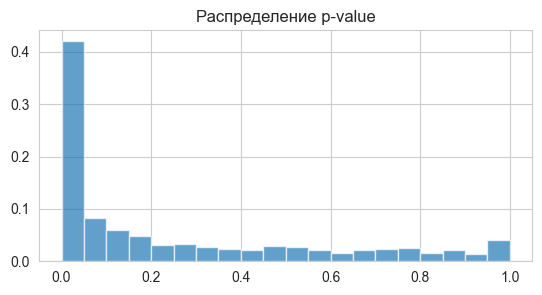

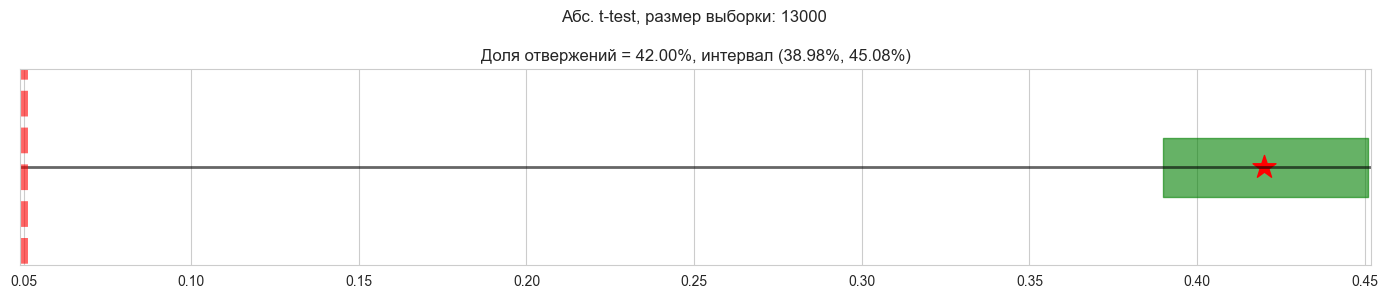

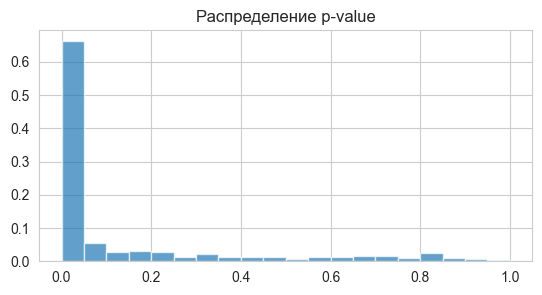

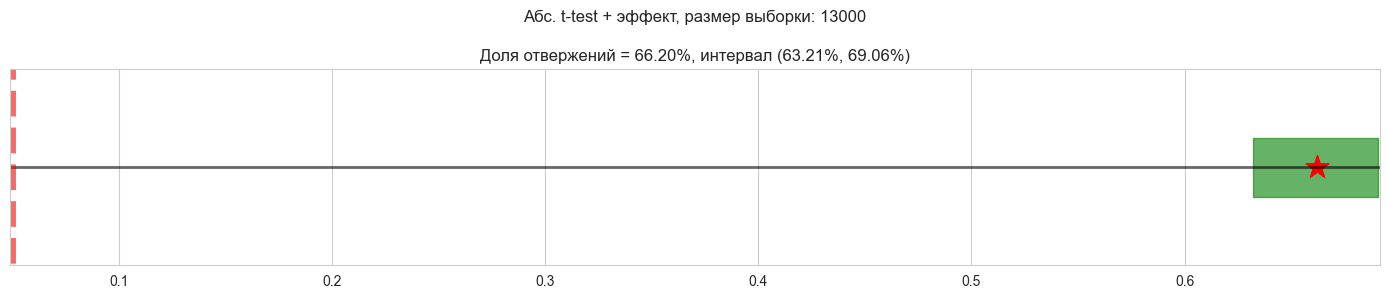

(0.662, 0.6321115753976023, 0.6906485548530779)

In [20]:
opt_sample_size = 13000

def stratified_ttest(x_data, y_data, method='post_stratified', alpha=0.05):  # выше я много удалил, проще было заново скопировать из ноутбука
    '''Стратифицированный абсолютный t-test.'''
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    return stat, pvalue, left_bound, right_bound

run_experiments(stratified_ttest, df, opt_sample_size, f'Абс. t-test, размер выборки: {opt_sample_size}', stratified=True)
run_experiments(stratified_ttest, df, opt_sample_size, f'Абс. t-test + эффект, размер выборки: {opt_sample_size}', effect=0.05, stratified=True)

*Принципиальных отличий не видно*

Сделайте выводы.

*В этой задаче удалось задизайнить эксперимент в условиях, приближенных к реальным*

## Стратификация

---
### Задача 3.

Пусть в общей совокупности данных имеется $K$ страт, причем вес страты $k \in \{1, ..., K\}$ равен $w_k$, где $w_1+...+w_K=1$. Пусть также выборка размера $n$ выбрана случайно, то есть вероятность выбрать элемент из страты $k$ равна $w_k$.

Посчитайте $\mathsf{E} \frac{1}{n_k}$ с точностью до $o(1/n^2)$, где $n_k$ &mdash; количество элементов выборки из страты $k$.

*Указание.* Разложите по Тейлору функцию $f(x)=1/x$ в точке $x_0\not=0$.

*Решил и сдал в рамках прошлого дз (AB2). Там задачу прикреплял отдельным файлом AB2.pdf*

---
### Задача 4.

Пусть $Y_1, ..., Y_n$ &mdash; выборка целевого признака, а $X_1, ..., X_n$ &mdash; соответствующая выборка ковариат. Пусть также все объекты делятся на $K$ страт. Получите формулу значения $\theta$ в методе CUPED при использовании стратифицированного среднего в случае
* стратифицированного семплирования,
* случайного семплирования.

---
### Задача 5.

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности 
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Реализуйте эту процедруру.

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.